http://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/export?bbox=162.356,-23.0,168.398,-18.9&bboxSR=4326&imageSR=4326&size=200,135&dpi=96&format=png32&f=image


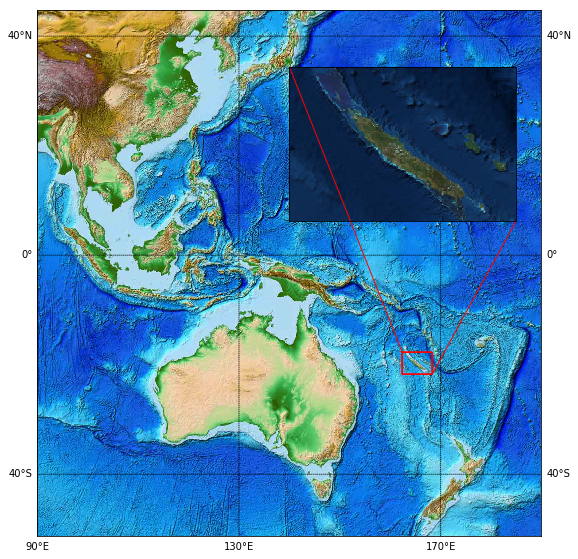

In [172]:
import cartopy.io.img_tiles as cimgt
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import TransformedBbox, BboxPatch, BboxConnector
from matplotlib.transforms import Bbox

def mark_inset(ax, ax2, m, m2, loc1=(1, 2), loc2=(3, 4), **kwargs):
    """
    Patched mark_inset to work with Basemap.
    Reason: Basemap converts Geographic (lon/lat) to Map Projection (x/y) coordinates

    Additionally: set connector locations separately for both axes:
        loc1 & loc2: tuple defining start and end-locations of connector 1 & 2
    """

    # Doesn't work for Basemap
#    rect = TransformedBbox(inset_axes.viewLim, parent_axes.transData)

#    axzoom_geoLims = np.array(m2(*ax2.viewLim._points.T, inverse=True))
    axzoom_geoLims = m2(ax2.get_xlim(), ax2.get_ylim(), inverse=True)
    rect = TransformedBbox(Bbox(np.array(m(*axzoom_geoLims)).T), ax.transData)

    pp = BboxPatch(rect, fill=False, **kwargs)
    ax.add_patch(pp)

    p1 = BboxConnector(ax2.bbox, rect, loc1=loc1[0], loc2=loc1[1], **kwargs)
    ax2.add_patch(p1)
    p1.set_clip_on(False)
    p2 = BboxConnector(ax2.bbox, rect, loc1=loc2[0], loc2=loc2[1], **kwargs)
    ax2.add_patch(p2)
    p2.set_clip_on(False)

    return pp, p1, p2

# create new figure, axes instances.
fig=plt.figure(figsize=(7,8))
#axes=fig.add_axes()
axes=fig.add_axes([0,0,1,1])
# setup mercator map projection.
nlim, slim, wlim, elim = 43.8, -48.8, 90, 190
m = Basemap(llcrnrlon=wlim,llcrnrlat=slim,urcrnrlon=elim,urcrnrlat=nlim,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc')
# nylat, nylon are lat/lon of New York
#nylat = 40.78; nylon = -73.98
# lonlat, lonlon are lat/lon of London.
#lonlat = 51.53; lonlon = 0.08
# draw great circle route between NY and London
#m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='b')
m.etopo()
#m.drawcoastlines()
# draw parallels
m.drawparallels(np.arange(-40,50,40),labels=[1,1,0,1])
# draw meridians
m.drawmeridians(np.arange(90,190,40),labels=[1,1,0,1])
#ax.set_title('Great Circle from New York to London')
#m.fillcontinents()
#m.drawmapscale(-90,27,-90,27,1000)
lon = (162.356, 168.398)
lat = (-18.9, -23)
xind, yind = [0,1,1,0,0], [0,0,1,1,0]
lons, lats = np.asarray([lon[i] for i in xind]), np.asarray([lat[i] for i in yind])
x,y = m(lons,lats)
plt.plot(x,y, 10, color='red' )
#stamen_terrain = cimgt.QuadtreeTiles(style='street')
#stamen_terrain = cimgt.StamenTerrain(style='satellite')
axin = fig.add_axes((0.5, 0.5,0.45,0.45))

axin.set_xlim(lon[0], lon[1])
axin.set_xlim(lat[0], lat[1])
#axin.add_image(stamen_terrain, 7)

#axins2 = zoomed_inset_axes(axes, 800000, loc=1)
#axins2.add_image(stamen_terrain)

#axins2.set_xlim(162.356, 168.398)
#axins2.set_ylim(-23.321, -17.539)
map2 = Basemap(llcrnrlon=162.356,llcrnrlat=-23,urcrnrlon=168.398,urcrnrlat=-18.9, ax=axin)
map2.arcgisimage(service='World_Imagery', xpixels = 200, verbose= True)
#map2 = Basemap(llcrnrlon=162.356,llcrnrlat=-23.321,urcrnrlon=168.398,urcrnrlat=-17.539, ax=axins2, resolution='h')
#map2.drawmapboundary(fill_color='#7777ff')
#map2.shadedrelief()
#map2.drawmapboundary(fill_color='#7777ff')
#map2.fillcontinents(color='#ddaa66', lake_color='#7777ff', zorder=1)
#map2.drawcoastlines()
mark_inset(axes, axin, m, map2, loc1=(2, 2), loc2=(4, 4),**{'color':'red'})

#mark_inset(axes, axin,  loc1=2, loc2=4, fc="none", ec="r", lw=8)
fig.savefig('test.png', format='png', dpi=300)
plt.show()

In [153]:
lons.shape

(5,)

In [157]:
axin.bbox

TransformedBbox(
    Bbox(x0=0.5, y0=0.5914039225422045, x1=0.95, y1=0.8585960774577954),
    BboxTransformTo(
        TransformedBbox(
            Bbox(x0=0.0, y0=0.0, x1=7.0, y1=8.0),
            Affine2D(
                [[72.  0.  0.]
                 [ 0. 72.  0.]
                 [ 0.  0.  1.]]))))

In [161]:
from matplotlib.transforms import Bbox

In [162]:
Bbox

Help on class Bbox in module matplotlib.transforms:

class Bbox(BboxBase)
 |  A mutable bounding box.
 |  
 |  Method resolution order:
 |      Bbox
 |      BboxBase
 |      TransformNode
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __format__(self, fmt)
 |      default object formatter
 |  
 |  __init__(self, points, **kwargs)
 |      Parameters
 |      ----------
 |      points : ndarray
 |          A 2x2 numpy array of the form ``[[x0, y0], [x1, y1]]``.
 |      
 |      Notes
 |      -----
 |      If you need to create a :class:`Bbox` object from another form
 |      of data, consider the static methods :meth:`unit`,
 |      :meth:`from_bounds` and :meth:`from_extents`.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  __str__(self)
 |      Return str(self).
 |  
 |  get_points(self)
 |      Get the points of the bounding box directly as a numpy array
 |      of the form: ``[[x0, y0], [x1, y1]]``.
 |  
 |  ignore(self, value)
 |      Set whether the exis

In [141]:
plt.show()

In [119]:
m(axin.get_xlim()[(np.array([0,0,1,1,0]),)], axin.get_ylim()[0])

TypeError: tuple indices must be integers or slices, not tuple

In [126]:
x0, x1 =axin.get_xlim()

In [127]:
x0

162.356

http://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/export?bbox=162.356,-23.2,168.398,-17.539&bboxSR=4326&imageSR=4326&size=1500,1405&dpi=96&format=png32&f=image


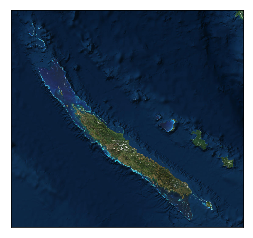

In [61]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

map2 = Basemap(llcrnrlon=162.356,llcrnrlat=-23.2,urcrnrlon=168.398,urcrnrlat=-17.539, ax=ax)
#http://server.arcgisonline.com/arcgis/rest/services

map2.arcgisimage(service='World_Imagery', xpixels = 1500, verbose= True)
plt.show()

In [82]:
18/2.5

7.2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


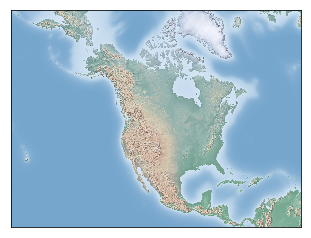

In [5]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m.shadedrelief()
plt.show()

/home/selam/anaconda3/envs/carto2/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


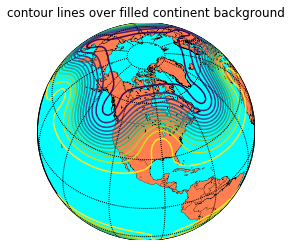

In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# make up some data on a regular lat/lon grid.
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
# compute native map projection coordinates of lat/lon grid.
x, y = map(lons*180./np.pi, lats*180./np.pi)
# contour data over the map.
cs = map.contour(x,y,wave+mean,15,linewidths=1.5)
plt.title('contour lines over filled continent background')
plt.show()

/home/selam/anaconda3/envs/carto2/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/selam/anaconda3/envs/carto2/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


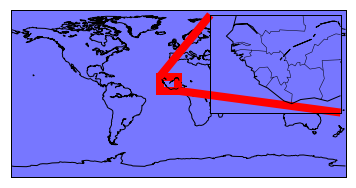

In [95]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111)

map = Basemap(projection='cyl', 
              lat_0=0, lon_0=0)

map.drawmapboundary(fill_color='#7777ff')
map.fillcontinents(color='#ddaa66', lake_color='#7777ff', zorder=0)
map.drawcoastlines()

lons = np.array([-13.7, -10.8, -13.2, -96.8, -7.99, 7.5, -17.3, -3.7])
lats = np.array([9.6, 6.3, 8.5, 32.7, 12.5, 8.9, 14.7, 40.39])
cases = np.array([1971, 7069, 6073, 4, 6, 20, 1, 1])
deaths = np.array([1192, 2964, 1250, 1, 5, 8, 0, 0])
places = np.array(['Guinea', 'Liberia', 'Sierra Leone','United States', 'Mali', 'Nigeria', 'Senegal', 'Spain'])

x, y = map(lons, lats)



axins = zoomed_inset_axes(ax, 7, loc=1)
axins.set_xlim(-20, 0)
axins.set_ylim(3, 18)

plt.xticks(visible=False)
plt.yticks(visible=False)

map2 = Basemap(llcrnrlon=-20,llcrnrlat=3,urcrnrlon=0,urcrnrlat=18, ax=axins)
map2.drawmapboundary(fill_color='#7777ff')
map2.fillcontinents(color='#ddaa66', lake_color='#7777ff', zorder=0)
map2.drawcoastlines()
map2.drawcountries()


mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="r", lw=8)

plt.show()